In [ ]:
!pip install geopandas
!pip install folium

In [1]:
import os
import pandas as pd

# BUS INFORMATION SYSYEM 불러오기
busLocInfo = pd.read_csv("C:\\Users\KOTI\Desktop\SQL연습\데이터\sejong_busLocInfo_20230315.csv",sep ='|',header = None)
node = pd.read_csv("C:\\Users\KOTI\Desktop\SQL연습\데이터\sejong_node_20230315.csv",sep='|',header = None)
route = pd.read_csv("C:\\Users\KOTI\Desktop\SQL연습\데이터\sejong_route_20230315.csv",sep='|',header = None)
routeNodeCompo = pd.read_csv("C:\\Users\KOTI\Desktop\SQL연습\데이터\sejong_routeNodeCompo_20230315.csv",sep='|',header = None)
Vehicle = pd.read_csv("C:\\Users\KOTI\Desktop\SQL연습\데이터\sejong_vehicle_20230315.csv",sep = '|',header = None)

# BUS INFORMATION SYSYEM 열 이름 지정
busLocInfo_column = [["MODE_ID","VEHICLE_ID","USER_ID","USER_LOC","ROUTE_ID","NODE_ID","LAST_VEHICLE","LAST_VEHICLE_EBASED_ID","MSG_GEN_TIME","NODE_ZONE_ID","NODE_ENTRY_TIME","NODE_EXIT_TIME","NODE_TRIP_TIME","GPS_LATI","GPS_LONG","COLLECTD_TIME","COLLECTD_TERM_TIME","NODE_VEHICLE_ORDER","NODE_DISTANCE","NODE_OFFSET_DISTANCE","EVT_CD","NOW_TERM_CID","SPEED","DIR","RUN_CNT","RUN_YN","STRE_ORDR","TOTAL_DIST","WRITEDTIME"]]
node_column = [["NODE_ID","NODE_NM","NODE_TP","CENTER_YN","ADMIN_NM","REMARK","NODE_CL","NODE_SUB_TP","NODE_ENM","GPS_LATI","GPS_LONG","CITY_CD","DISTRICT_ID","COLLECTD_TIME","ORG_ID","ADMIN_ID","OFFSET","DIRECTION","DOWNTOWN_YN","NODE_MOBILE_ID"]]
route_column = [["ROUTE_ID","ROUTE_NM","ROUTE_TP","START_NODE_ID","END_NODE_ID","PERM_VOL","BEGIN_DATE","CLOSE_DATE","ROUTE_EX","COMPANY_NM","ADMIN_NM","REMARK","DETAIL_ROUTE_TP_CD","START_NODE_NM","END_NODE_NM","UPDOWN_TP_CD","START_FIRST_VEHICLE_TIME","START_LAST_VEHICLE_TIME","END_FIRST_VEHICLE_TIME","END_LAST_VEHICLE_TIME","ALLOC_INTERVAL_MTIME","ALLO_INTERVAL_SAT","ALLO_INTERVAL_SUN","DAILY_MOVING_COUNT","DISTANCE","REQ_MTIME","SPEED","COLLECTD_TIME","VIA_HIGHWAY_NM","DISTRICT_ID","VEH_TYPE","START_SAT_FIRST_VEHICLE_TIME","START_SAT_LAST_VEHICLE_TIME","END_SAT_FIRST_VEHICLE_TIME","END_SAT_LAST_VEHICLE_TIME","START_SUN_FIRST_VEHICLE_TIME","START_SUN_LAST_VEHICLE_TIME","END_SUN_FIRST_VEHICLE_TIME","END_SUN_LAST_VEHICLE_TIME","CHARGE"]]
routecNodeCompo_column = [["ROUTE_ID","OPER_WEEK","FIRST_VEHICLE_TIME","LAST_VEHICLE_TIME","MIN_INTERVAL_MTIME","MAX_INTERVAL_MTIME","REMARK","NODE_ID","MOVING_SEQUENCE","UPDOWN_TP_CD","CITY_CD","ROUTE_NODE_COMPOTYPE_CD","PREV_NODE_ID","BETWEEN_NODE_DIST","EBASED_REMAIN_DIST","COLLECTD_TIME","ORG_ID","NODE_STOP_YN","NODE_STOP_SEQ","NODE_NM","GPS_LATI","GPS_LONG","B_NODE_DIST","A_NODE_DIST","B_STAT_DIST","A_STAT_DIST","B_CROS_DIST","A_CROS_DIST","NODE_STOP_TP","NODE_STOP_MOBILE_ID"]]
Vehicle_column = [["VEHICLE_ID","VEHICLE_NO","VEHICLE_TP","LOW_FLOOR_YN","VEHICLE_CAPA","ADMIN_NM","COMPANY_NM","REMARK","VEHICLE_TP_CD","CITY_CD","COLLECTD_TIME","ADMIN_ID","COMPANY_ID"]]
                 
busLocInfo.columns = busLocInfo_column
node.columns = node_column
route.columns = route_column
routeNodeCompo.columns = routecNodeCompo_column
Vehicle.columns = Vehicle_column

In [2]:
#busLocInfo.to_csv('busLocInfo.csv',header=False,index=False,date_format='YYYYMMDDhhmmss')
#node.to_csv('node.csv',header=False,index=False,date_format='YYYYMMDDhhmmss')
#route.to_csv('route.csv',header=False,index=False,date_format='YYYYMMDDhhmmss')
#routeNodeCompo.to_csv('routeNodeCompo.csv',header=False,index=False,date_format='YYYYMMDDhhmmss')
#Vehicle.to_csv('Vehicle.csv',header=False,index=False,date_format='YYYYMMDDhhmmss')

In [26]:
# 데이터 둘러보기
busLocInfo.head()

,MODE_ID,VEHICLE_ID,USER_ID,USER_LOC,ROUTE_ID,NODE_ID,LAST_VEHICLE,LAST_VEHICLE_EBASED_ID,MSG_GEN_TIME,NODE_ZONE_ID,...,NODE_OFFSET_DISTANCE,EVT_CD,NOW_TERM_CID,SPEED,DIR,RUN_CNT,RUN_YN,STRE_ORDR,TOTAL_DIST,WRITEDTIME
0,NaN,SJB293045529,NaN,NaN,SJB293000033,SJB293064017,NaN,NaN,20230314234937,NaN,...,NaN,0,NaN,10,0,NaN,Y,NaN,NaN,20230314235004
1,NaN,SJB293045523,NaN,NaN,SJB293000107,SJB293019027,NaN,NaN,20230314234937,NaN,...,NaN,0,NaN,3,0,NaN,Y,NaN,NaN,20230314235004
2,NaN,SJB293045628,NaN,NaN,SJB293000168,SJB186004229,NaN,NaN,20230314234955,NaN,...,NaN,0,NaN,47,0,NaN,Y,NaN,NaN,20230314235004
3,NaN,SJB293045524,NaN,NaN,SJB293000281,SJB293011064,NaN,NaN,20230314234942,NaN,...,NaN,0,NaN,15,0,NaN,Y,NaN,NaN,20230314235004
4,NaN,SJB293045533,NaN,NaN,SJB293000033,SJB2930021900,NaN,NaN,20230314235004,NaN,...,NaN,0,NaN,40,0,NaN,Y,NaN,NaN,20230314235004


In [27]:
busLocInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658802 entries, 0 to 1658801
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   (MODE_ID,)                 0 non-null        float64
 1   (VEHICLE_ID,)              1658802 non-null  object 
 2   (USER_ID,)                 0 non-null        float64
 3   (USER_LOC,)                0 non-null        float64
 4   (ROUTE_ID,)                1658802 non-null  object 
 5   (NODE_ID,)                 1658802 non-null  object 
 6   (LAST_VEHICLE,)            0 non-null        float64
 7   (LAST_VEHICLE_EBASED_ID,)  0 non-null        float64
 8   (MSG_GEN_TIME,)            1658802 non-null  int64  
 9   (NODE_ZONE_ID,)            0 non-null        float64
 10  (NODE_ENTRY_TIME,)         0 non-null        float64
 11  (NODE_EXIT_TIME,)          0 non-null        float64
 12  (NODE_TRIP_TIME,)          0 non-null        float64
 13  (GPS_LATI,) 

In [28]:
node.head()

,NODE_ID,NODE_NM,NODE_TP,CENTER_YN,ADMIN_NM,REMARK,NODE_CL,NODE_SUB_TP,NODE_ENM,GPS_LATI,GPS_LONG,CITY_CD,DISTRICT_ID,COLLECTD_TIME,ORG_ID,ADMIN_ID,OFFSET,DIRECTION,DOWNTOWN_YN,NODE_MOBILE_ID
0,SJB183002210,대전역동광장,0.0,N,NaN,NaN,NaN,NaN,NaN,36.333784,127.437112,NaN,NaN,20230315050229,NaN,NaN,NaN,142.0,NaN,11410.0
1,SJB183002355,대전역,NaN,N,NaN,NaN,NaN,NaN,NaN,36.333440,127.431410,NaN,NaN,20230315050229,NaN,NaN,NaN,NaN,NaN,12370.0
2,SJB183002358,대전역,NaN,N,NaN,NaN,NaN,NaN,NaN,36.332540,127.432130,NaN,NaN,20230315050229,NaN,NaN,NaN,NaN,NaN,12400.0
3,SJB183002527,대전역,NaN,N,NaN,NaN,NaN,NaN,NaN,36.332790,127.431973,NaN,NaN,20230315050229,NaN,NaN,NaN,NaN,NaN,14730.0
4,SJB186001447,충대농대종점,NaN,N,NaN,NaN,NaN,NaN,NaN,36.367390,127.352170,NaN,NaN,20230315050229,NaN,NaN,NaN,NaN,NaN,42750.0


In [23]:
node.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (NODE_ID,)         2761 non-null   object 
 1   (NODE_NM,)         2761 non-null   object 
 2   (NODE_TP,)         1963 non-null   float64
 3   (CENTER_YN,)       2761 non-null   object 
 4   (ADMIN_NM,)        0 non-null      float64
 5   (REMARK,)          1151 non-null   object 
 6   (NODE_CL,)         0 non-null      float64
 7   (NODE_SUB_TP,)     0 non-null      float64
 8   (NODE_ENM,)        0 non-null      float64
 9   (GPS_LATI,)        2761 non-null   float64
 10  (GPS_LONG,)        2761 non-null   float64
 11  (CITY_CD,)         0 non-null      float64
 12  (DISTRICT_ID,)     1747 non-null   float64
 13  (COLLECTD_TIME,)   2761 non-null   int64  
 14  (ORG_ID,)          0 non-null      float64
 15  (ADMIN_ID,)        0 non-null      float64
 16  (OFFSET,)          0 non

In [29]:
route.head()

,ROUTE_ID,ROUTE_NM,ROUTE_TP,START_NODE_ID,END_NODE_ID,PERM_VOL,BEGIN_DATE,CLOSE_DATE,ROUTE_EX,COMPANY_NM,...,VEH_TYPE,START_SAT_FIRST_VEHICLE_TIME,START_SAT_LAST_VEHICLE_TIME,END_SAT_FIRST_VEHICLE_TIME,END_SAT_LAST_VEHICLE_TIME,START_SUN_FIRST_VEHICLE_TIME,START_SUN_LAST_VEHICLE_TIME,END_SUN_FIRST_VEHICLE_TIME,END_SUN_LAST_VEHICLE_TIME,CHARGE
0,SJB293000024,430,2,SJB293064154,SJB293055058,0.0,20141024.0,99991231.0,(꽃동네대학교~세종고속시외버스터미널),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SJB293000029,550,2,SJB286070006,SJB293064017,0.0,20130307.0,99991231.0,(산성동종점~조치원역),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SJB293000030,551,3,SJB293001084,SJB270014001,0.0,20141021.0,99991231.0,(조치원역~산성시장),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SJB293000033,601,2,SJB293064525,SJB293064017,0.0,20141021.0,99991231.0,(수루배마을6단지~조치원역),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SJB293000039,655,7,SJB186004119,SJB293055058,0.0,20130221.0,99991231.0,(충남대학교~세종고속시외버스터미널),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (ROUTE_ID,)                      119 non-null    object 
 1   (ROUTE_NM,)                      119 non-null    object 
 2   (ROUTE_TP,)                      119 non-null    int64  
 3   (START_NODE_ID,)                 119 non-null    object 
 4   (END_NODE_ID,)                   119 non-null    object 
 5   (PERM_VOL,)                      19 non-null     float64
 6   (BEGIN_DATE,)                    24 non-null     float64
 7   (CLOSE_DATE,)                    24 non-null     float64
 8   (ROUTE_EX,)                      119 non-null    object 
 9   (COMPANY_NM,)                    0 non-null      float64
 10  (ADMIN_NM,)                      119 non-null    object 
 11  (REMARK,)                        0 non-null      float64
 12  (DETAIL_ROUTE_TP_CD,) 

In [32]:
routeNodeCompo.head()

,ROUTE_ID,OPER_WEEK,FIRST_VEHICLE_TIME,LAST_VEHICLE_TIME,MIN_INTERVAL_MTIME,MAX_INTERVAL_MTIME,REMARK,NODE_ID,MOVING_SEQUENCE,UPDOWN_TP_CD,...,GPS_LATI,GPS_LONG,B_NODE_DIST,A_NODE_DIST,B_STAT_DIST,A_STAT_DIST,B_CROS_DIST,A_CROS_DIST,NODE_STOP_TP,NODE_STOP_MOBILE_ID
0,SJB293000024,NaN,NaN,NaN,NaN,NaN,NaN,SJB293064154,1,NaN,...,36.524305,127.398681,78,NaN,NaN,NaN,NaN,NaN,1.0,33059.0
1,SJB293000024,NaN,NaN,NaN,NaN,NaN,NaN,SJB2740002303,2,NaN,...,36.529398,127.394887,686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SJB293000024,NaN,NaN,NaN,NaN,NaN,NaN,SJB293012051,3,NaN,...,36.529780,127.396370,168,NaN,NaN,NaN,NaN,NaN,NaN,33012.0
3,SJB293000024,NaN,NaN,NaN,NaN,NaN,NaN,SJB2740002303,4,NaN,...,36.529398,127.394887,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SJB293000024,NaN,NaN,NaN,NaN,NaN,NaN,SJB293900023,5,NaN,...,36.529005,127.393232,185,NaN,NaN,NaN,NaN,NaN,NaN,64077.0


In [34]:
routeNodeCompo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (ROUTE_ID,)                 8107 non-null   object 
 1   (OPER_WEEK,)                0 non-null      float64
 2   (FIRST_VEHICLE_TIME,)       0 non-null      float64
 3   (LAST_VEHICLE_TIME,)        0 non-null      float64
 4   (MIN_INTERVAL_MTIME,)       0 non-null      float64
 5   (MAX_INTERVAL_MTIME,)       0 non-null      float64
 6   (REMARK,)                   0 non-null      float64
 7   (NODE_ID,)                  8107 non-null   object 
 8   (MOVING_SEQUENCE,)          8107 non-null   int64  
 9   (UPDOWN_TP_CD,)             0 non-null      float64
 10  (CITY_CD,)                  0 non-null      float64
 11  (ROUTE_NODE_COMPOTYPE_CD,)  0 non-null      float64
 12  (PREV_NODE_ID,)             0 non-null      float64
 13  (BETWEEN_NODE_DIST,)        8107 

In [8]:
GPS_data = routeNodeCompo[['GPS_LATI','GPS_LONG']]
GPS_data = GPS_data.dropna(axis=0)
GPS_data.isnull().sum()

GPS_LATI    0
GPS_LONG    0
dtype: int64

In [36]:
Vehicle.head()

,VEHICLE_ID,VEHICLE_NO,VEHICLE_TP,LOW_FLOOR_YN,VEHICLE_CAPA,ADMIN_NM,COMPANY_NM,REMARK,VEHICLE_TP_CD,CITY_CD,COLLECTD_TIME,ADMIN_ID,COMPANY_ID
0,SJB293030001,세종70자0000,3,Y,NaN,NaN,NaN,초정밀 테스트,NaN,NaN,20230315050234,NaN,NaN
1,SJB293030002,세종70자0001,3,N,NaN,NaN,NaN,NaN,NaN,NaN,20230315050234,NaN,NaN
2,SJB293041012,세종70자1012,2,N,NaN,NaN,세종도시교통공사,NaN,NaN,NaN,20230315050234,NaN,293000002.0
3,SJB293041013,세종70자1013,2,N,NaN,NaN,세종도시교통공사,NaN,NaN,NaN,20230315050234,NaN,293000002.0
4,SJB293041014,세종70자1014,2,N,NaN,NaN,세종도시교통공사,NaN,NaN,NaN,20230315050234,NaN,293000002.0


In [35]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (VEHICLE_ID,)     321 non-null    object 
 1   (VEHICLE_NO,)     321 non-null    object 
 2   (VEHICLE_TP,)     321 non-null    int64  
 3   (LOW_FLOOR_YN,)   321 non-null    object 
 4   (VEHICLE_CAPA,)   0 non-null      float64
 5   (ADMIN_NM,)       0 non-null      float64
 6   (COMPANY_NM,)     319 non-null    object 
 7   (REMARK,)         6 non-null      object 
 8   (VEHICLE_TP_CD,)  0 non-null      float64
 9   (CITY_CD,)        0 non-null      float64
 10  (COLLECTD_TIME,)  321 non-null    int64  
 11  (ADMIN_ID,)       0 non-null      float64
 12  (COMPANY_ID,)     319 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 32.7+ KB


In [10]:
# 데이터 차원
print("Dimension of busLocInfo is",busLocInfo.shape)
print("Dimension of node is",node.shape)
print("Dimension of route is",route.shape)
print("Dimension of routeNodeCompo is",routeNodeCompo.shape)
print("Dimension of Vehicle is",Vehicle.shape)

Dimension of busLocInfo is (1658802, 29)
Dimension of node is (2761, 20)
Dimension of route is (119, 40)
Dimension of routeNodeCompo is (8107, 30)
Dimension of Vehicle is (321, 13)


In [11]:
# 데이터확인
print("busLocInfo 데이터의 노선_ID 개수는",busLocInfo['ROUTE_ID'].nunique())
print("busLocInfo 데이터의 정류장_ID 개수는",busLocInfo['NODE_ID'].nunique())
print("node 데이터의 정류장 개수_ID 개수는",node['NODE_ID'].nunique())
print("route 데이터의 노선_ID 개수는",route['ROUTE_ID'].nunique())
print("routeNodeCompo 데이터의 노선_ID 개수는",routeNodeCompo['ROUTE_ID'].nunique())
print("Vehicle 데이터의 차량_ID 개수는",Vehicle['VEHICLE_ID'].nunique())

busLocInfo 데이터의 노선_ID 개수는 ROUTE_ID    115
dtype: int64
busLocInfo 데이터의 정류장_ID 개수는 NODE_ID    2272
dtype: int64
node 데이터의 정류장 개수_ID 개수는 NODE_ID    2761
dtype: int64
route 데이터의 노선_ID 개수는 ROUTE_ID    119
dtype: int64
routeNodeCompo 데이터의 노선_ID 개수는 ROUTE_ID    119
dtype: int64
Vehicle 데이터의 차량_ID 개수는 VEHICLE_ID    321
dtype: int64


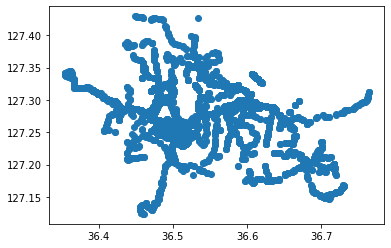

In [12]:
# Geopandas 사용
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(routeNodeCompo['GPS_LATI'],routeNodeCompo['GPS_LONG'])
plt.show()

In [13]:
#import folium
#sj_map = folium.Map(location=[36.539884,127.275745],
                   tiles = 'stamenterrain',
                   zoom_start=12)
#sj_map

IndentationError: unexpected indent (2559389879.py, line 3)

In [ ]:
#from folium import Marker
#for _, row in GPS_data.iterrows():
#    Marker(location = [row['GPS_LATI'], row['GPS_LONG']],
#          icon=folium.Icon(color='blue',icon='star')
#          ).add_to(sj_map)
#sj_map